<a href="https://colab.research.google.com/github/xahram/websmassessment_notebook/blob/master/assessemt_web.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget https://snap.stanford.edu/data/twitter.tar.gz
!tar xf twitter.tar.gz



--2022-03-27 10:41:47--  https://snap.stanford.edu/data/twitter.tar.gz
Resolving snap.stanford.edu (snap.stanford.edu)... 171.64.75.80
Connecting to snap.stanford.edu (snap.stanford.edu)|171.64.75.80|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 22339604 (21M) [application/x-gzip]
Saving to: ‘twitter.tar.gz’

twitter.tar.gz      100%[===================>]  21.30M  1.21MB/s    in 18s     

2022-03-27 10:42:05 (1.20 MB/s) - ‘twitter.tar.gz’ saved [22339604/22339604]



In [ ]:
!pip install networkx

Graph with 226 nodes and 3634 edges
0.013553658600255822


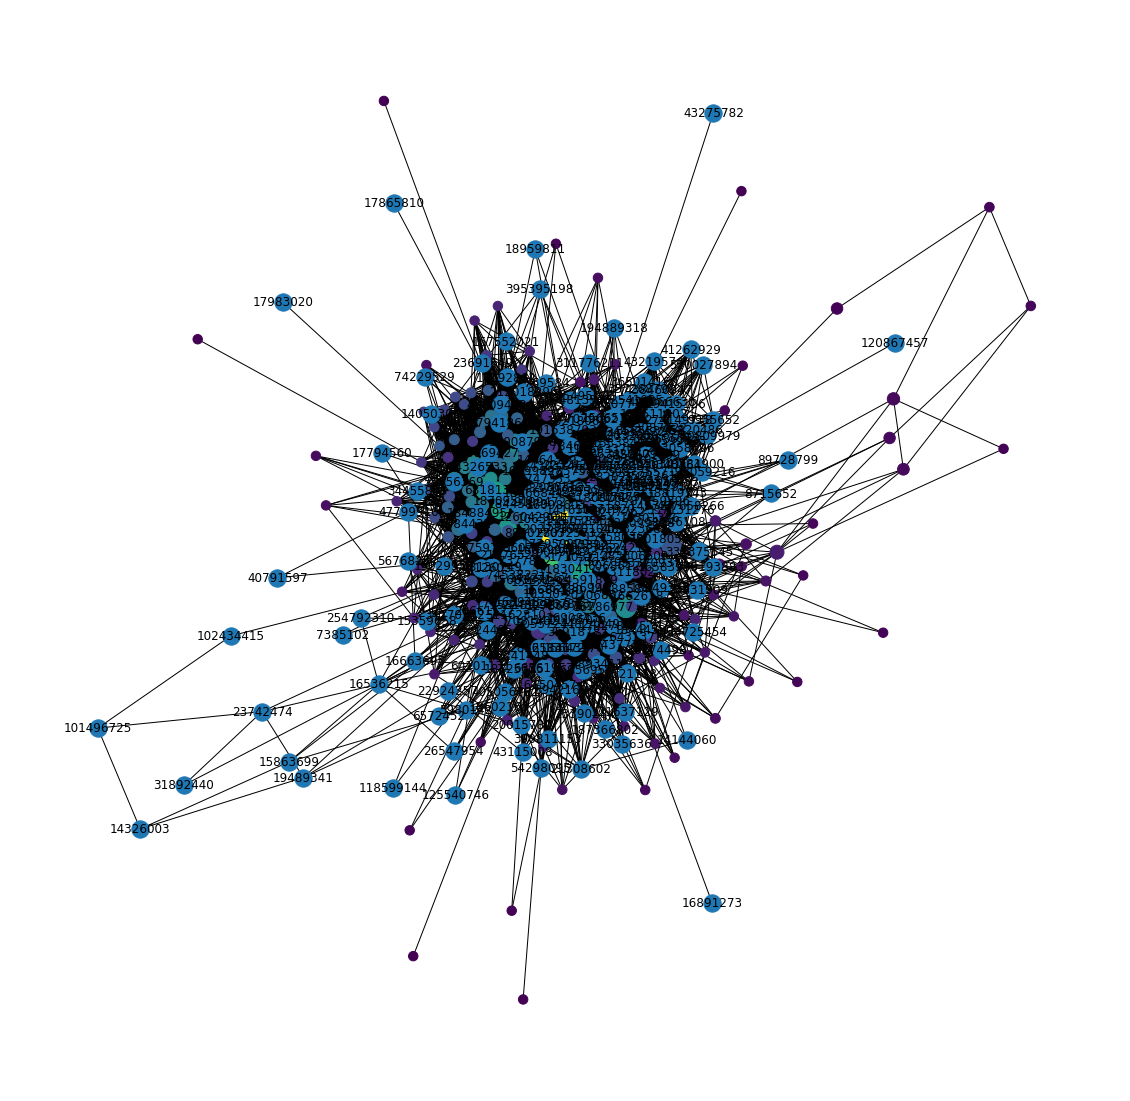

In [ ]:

from pathlib import Path
import networkx as nx
import matplotlib.pyplot as plt

path_to_facebook_data = Path() / "/content/twitter/102903198.edges"

G_fb = nx.read_edgelist(path_to_facebook_data, create_using=nx.Graph, nodetype=int) 

print(nx.info(G_fb))


nx.spring_layout(G_fb)

pos = nx.spring_layout(G_fb)
betCent = nx.betweenness_centrality(G_fb, normalized=True, endpoints=True)
node_color = [20000.0 * G_fb.degree(v) for v in G_fb]
node_size = [v * 10000 for v in betCent.values()]
plt.figure(figsize=(20,20))
nx.draw_networkx(G_fb, pos = pos,
    with_labels=False, node_color=node_color, node_size=node_size)
plt.axis("off")

print(sum(list(betCent.values()))/226)



nx.draw_networkx(G_fb)


In [ ]:

nx.shortest_path(G_fb)



{10350: {10350: [10350],
  15913: [10350, 15913],
  681813: [10350, 681813],
  756379: [10350, 14311802, 756379],
  769584: [10350, 43662236, 769584],
  794186: [10350, 15661871, 794186],
  1065921: [10350, 1065921],
  1183041: [10350, 1183041],
  3462421: [10350, 15758036, 3462421],
  4893411: [10350, 4893411],
  5980142: [10350, 20273398, 5980142],
  6068612: [10350, 6068612],
  6572452: [10350, 15661871, 6572452],
  7079062: [10350, 15758036, 7079062],
  7081402: [10350, 7081402],
  7377812: [10350, 7377812],
  7384432: [10350, 16799897, 7384432],
  7385102: [10350, 20273398, 7385102],
  7453822: [10350, 7453822],
  7860742: [10350, 7860742],
  7861312: [10350, 7861312],
  8207762: [10350, 14311802, 8207762],
  8715652: [10350, 58714972, 8715652],
  9199472: [10350, 9199472],
  9955652: [10350, 15758036, 9955652],
  14050306: [10350, 16799897, 14050306],
  14111650: [10350, 15661871, 14111650],
  14144060: [10350, 9199472, 14144060],
  14165096: [10350, 7377812, 14165096],
  1430374

In [ ]:
Twitter_nodes = list(G_fb.nodes)

nx.shortest_path(G_fb, Twitter_nodes[1], Twitter_nodes[-1])
nx.shortest_path_length(G_fb, Twitter_nodes[1], Twitter_nodes[-1])

3

0.052589922728674084


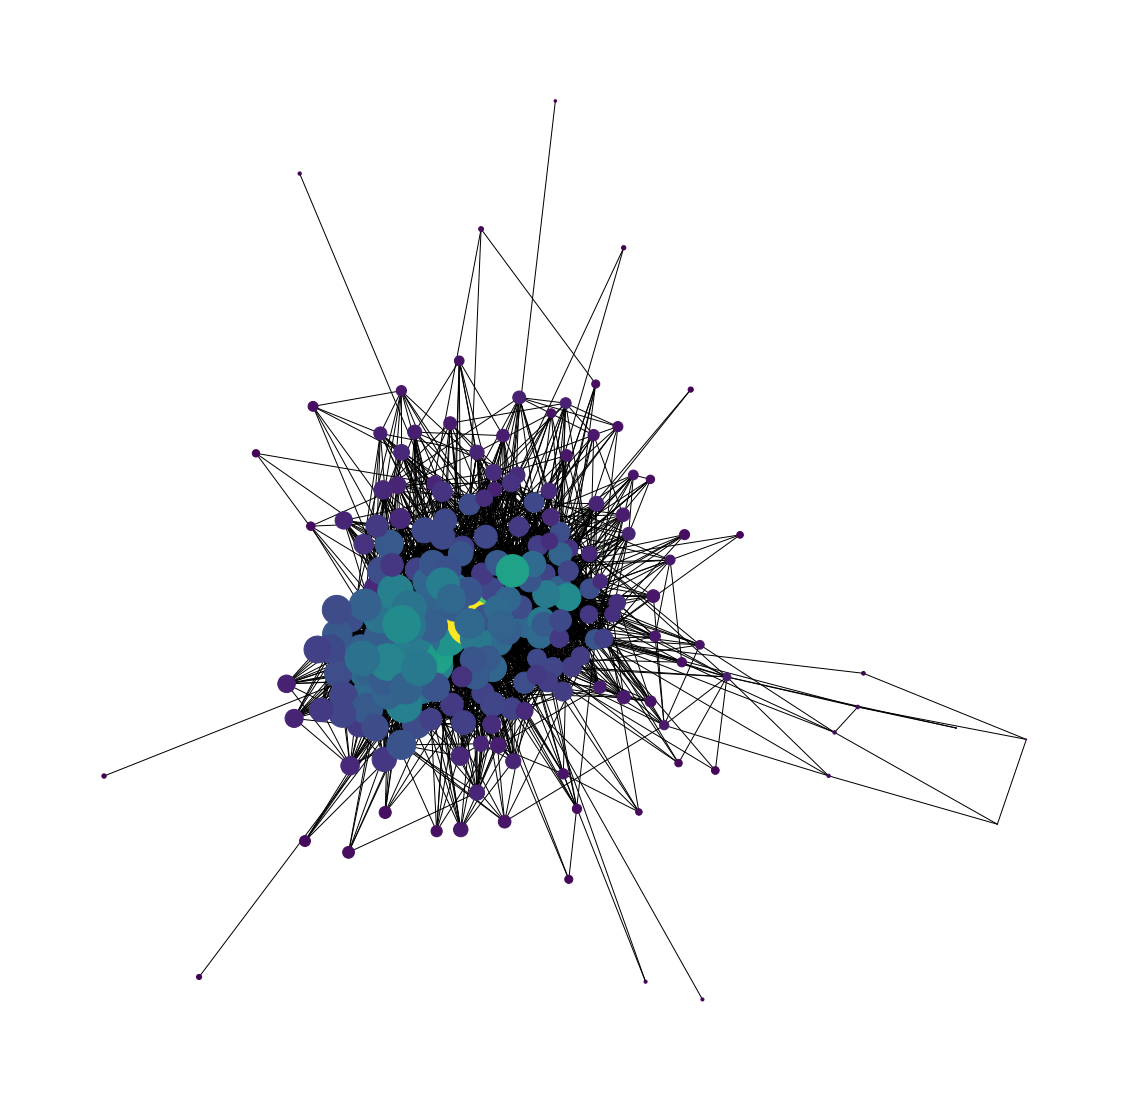

In [ ]:
######### EIGEN CENTRALITY MEASURE FOR TWITTER NODES



nx.spring_layout(G_fb)

pos = nx.spring_layout(G_fb)
eigen_centrality = nx.eigenvector_centrality(G_fb)
node_color = [20000.0 * G_fb.degree(v) for v in G_fb]
node_size = [v * 10000 for v in eigen_centrality.values()]
plt.figure(figsize=(20,20))
nx.draw_networkx(G_fb, pos = pos,
    with_labels=False, node_color=node_color, node_size=node_size)
plt.axis("off")

print(sum(list(eigen_centrality.values()))/226)


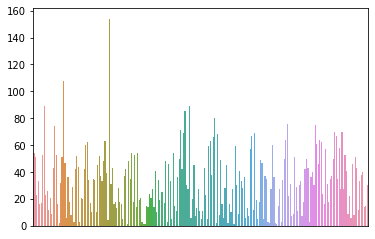

NodeView((32032000, 19507713, 16583672, 35918787, 20803125, 311776211, 16079941, 7861312, 7860742, 9955652, 462541005, 20747741, 17047105, 23559552, 20106852, 51246108, 20637608, 434725454, 18927441, 18666844, 15666380, 365014160, 21158690, 15271920, 16786977, 373018050, 369586333, 96747353, 16799897, 51162310, 18130749, 317846921, 130897520, 363426409, 438460947, 58714972, 16663695, 47799910, 31808762, 14888584, 315338495, 352226153, 300599613, 16909832, 167744987, 362286999, 126099878, 422066630, 191638793, 16038438, 390811153, 794186, 394216985, 17105214, 126042901, 7384432, 95820486, 62050341, 15343773, 19049747, 167010482, 60101131, 299715714, 7079062, 88501703, 18069427, 405323682, 404376053, 193059216, 20747847, 7377812, 172959279, 15439395, 14824849, 110481357, 212018296, 15661871, 17092862, 224809136, 223247584, 14111650, 14589257, 310087940, 18501326, 243058696, 18781900, 306472866, 344334227, 7453822, 357268791, 8207762, 308324295, 16894839, 280725732, 26841335, 16218063, 46

In [ ]:
####################### DEGREE OF EACH NODE

import matplotlib.pyplot as plt
import seaborn as sns

degree_of_twitter_nodes = dict(G_fb.degree())

degrees = [G_fb.degree(n) for n in G_fb.nodes()]
nodes = [n for n in G_fb.nodes()]

sns.barplot(x=nodes, y=degrees)
plt.xticks([])
plt.show()
G_fb.nodes()


In [ ]:
####### CALCULATING DEGREE CENTRALITY AND AVERAGE DEGREE CONNECTIVITY


print(sum(list(nx.average_degree_connectivity(G_fb).values()))/226)
print(sum(list(nx.degree_centrality(G_fb).values()))/226)

15.932313733911613
0.1429301868239922


In [ ]:
!pip install cdlib

     |████████████████████████████████| 228 kB 5.1 MB/s 
     |████████████████████████████████| 14.2 MB 52.8 MB/s 
     |████████████████████████████████| 2.6 MB 39.3 MB/s 
     |████████████████████████████████| 50 kB 5.1 MB/s 
     |████████████████████████████████| 3.1 MB 39.0 MB/s 
  Created wheel for pyclustering: filename=pyclustering-0.10.1.2-py3-none-any.whl size=2395122 sha256=5f07db61c02f7dd5bdcfc7436b35f4cb212c43d8bfc6dd76abff0a7e7f9197dc
  Stored in directory: /root/.cache/pip/wheels/ea/87/6b/1e0568b5ba9dc6518a25338bae90bd8392f35206bb90bb10f1
  Created wheel for python-Levenshtein: filename=python_Levenshtein-0.12.2-cp37-cp37m-linux_x86_64.whl size=149862 sha256=443dd3fdbf67fcfa361500ed3f7e07c4fcf9bc9e22373473e548f822d3ad10e5
  Stored in directory: /root/.cache/pip/wheels/05/5f/ca/7c4367734892581bb5ff896f15027a932c551080b2abd3e00d
Successfully built pyclustering python-Levenshtein


[0.7502115559075241, 0.7553579459155707, 0.49501350132731536, 0.3888846059400056]
[2.0332759609868045, 1.5684663536776213, 1.8595959595959597, 1.9133333333333333]


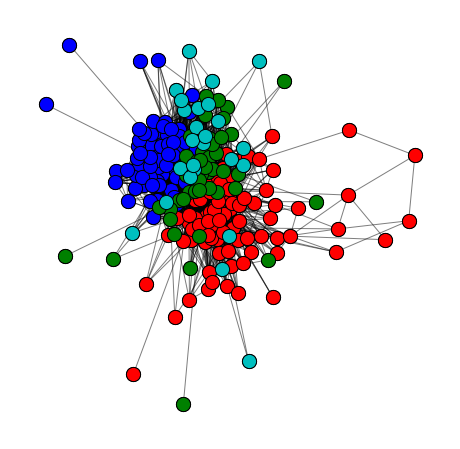

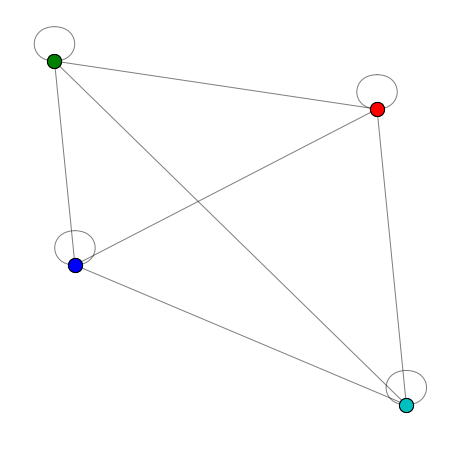

In [ ]:
from cdlib import algorithms, viz, evaluation

import networkx as nx
from pathlib import Path

path_to_facebook_data = Path() / "/content/twitter/102903198.edges"
G_fb = nx.read_edgelist(path_to_facebook_data, create_using=nx.Graph, nodetype=int)

coms = algorithms.louvain(G_fb, weight="weight",resolution=1.)

pos = nx.spring_layout(G_fb)

print(evaluation.avg_embeddedness(G_fb,coms,summary=False))

### Average Distance of Nodes
print(evaluation.avg_distance(G_fb,coms,summary=False))

viz.plot_network_clusters(G_fb,coms,pos)

viz.plot_community_graph(G_fb, coms)


In [ ]:
!pip install leidenalg

     |████████████████████████████████| 1.4 MB 4.2 MB/s 


In [ ]:
!pip install infomap  wurlitzer leidenalg

     |████████████████████████████████| 300 kB 5.2 MB/s 
     |████████████████████████████████| 1.4 MB 16.1 MB/s 
  Created wheel for infomap: filename=infomap-2.2.0-cp37-cp37m-linux_x86_64.whl size=5962254 sha256=eea601068934601b83b2cf80e57c60211202d7fc6296fcb49ee2edf26f3cc917
  Stored in directory: /root/.cache/pip/wheels/1d/32/a6/f27f5e8c1038dfa01be7373f386767d31bcd2ee899b2456c3c
Successfully built infomap


[0.7486347590902429, 0.7600173604997541, 0.5625726965949674]
[0.7486347590902429, 0.7600173604997541, 0.5625726965949674]
[2.039671682626539, 1.5805257312106626, 1.9748251748251748]


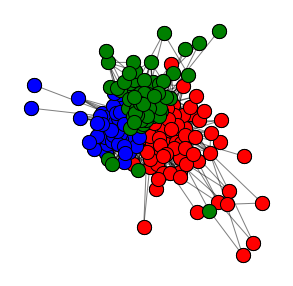

In [ ]:

from cdlib import evaluation

leiden_coms = algorithms.leiden(G_fb)
print(leiden_coms.avg_embeddedness(summary=False))

### Average Centrality within Communities
print(evaluation.avg_embeddedness(G_fb,leiden_coms,summary=False))

### Average Distance of Nodes
print(evaluation.avg_distance(G_fb,leiden_coms,summary=False))


pos = nx.spring_layout(G_fb)
viz.plot_network_clusters(G_fb, leiden_coms, pos, figsize=(5, 5))

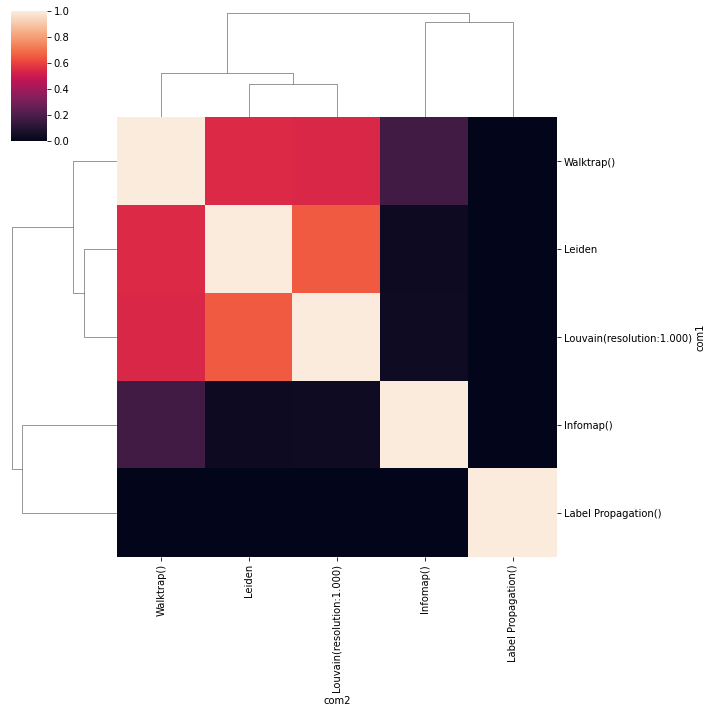

In [ ]:
from cdlib import evaluation

lp_coms = algorithms.label_propagation(G_fb)
leiden_coms = algorithms.leiden(G_fb)
wp_coms = algorithms.walktrap(G_fb)
infomap_coms = algorithms.infomap(G_fb)

viz.plot_sim_matrix([coms,leiden_coms, lp_coms, wp_coms, infomap_coms],evaluation.adjusted_mutual_information)

In [ ]:
from networkx.algorithms.bipartite.centrality import betweenness_centrality

sorted(eigen_centrality, key=eigen_centrality.get, reverse=True)[:5]
betweenness = nx.betweenness_centrality(G_fb)
print(sorted(betweenness, key=betweenness.get, reverse=True)[:5])






[16038438, 7861312, 1183041, 7081402, 20661527]


In [ ]:
sorted(betCent, key=betCent.get, reverse=True)[:5]

[16038438, 7861312, 1183041, 7081402, 20661527]

In [ ]:
sorted(eigen_centrality, key=eigen_centrality.get, reverse=True)[:5]

[16038438, 7861312, 21158690, 130897520, 20747847]

In [ ]:
nx.clustering(G_fb)